<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [46]:
# Isi dengan data diri Anda
NAMA = "Helga Syahda Elmira"
KELAS = "D"
NPM = "2006463686"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [""""
https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#Impute_Replace_Missing_Values_with_Mode
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
Pengerjaan lab-lab sebelumnya
https://algorit.ma/blog/naive-bayes-2022/
https://www.dqlab.id/belajar-algotirma-naive-bayes
https://stackoverflow.com/questions/33477736/how-to-combine-the-outputs-of-multiple-naive-bayes-classifier
https://www.trivusi.web.id/2022/08/algoritma-random-forest.html#:~:text=Kelebihan%20Algoritma%20Random%20Forest,-Berikut%20adalah%20kelebihan&text=Bekerja%20dengan%20baik%20dengan%20data,baik%20daripada%20algoritma%20klasifikasi%20lainnya.
"""]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Helga Syahda Elmira dari kelas D dengan NPM 2006463686, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Helga Syahda Elmira)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SEMESTER 5 - Helga/KASDD/after uts/tugas 2/mobile_phone.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890,668.0,13,4,19.0,1,1.0,0.0,0
2017,1965,1,2.6,1,0,0,39.0,NaN,187,4,...,915,1965,2032.0,11,10,16.0,1,1.0,1.0,2
2018,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632,3057.0,9,1,5.0,1,1.0,0.0,3
2019,1512,0,0.9,0,4,1,46.0,NaN,145,5,...,336,670,869.0,18,10,19.0,1,1.0,1.0,0


In [ ]:
# Ringkasan mengenai data setiap kolom 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

In [ ]:
# Jumlah atribut numerik

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
attr_num = df.select_dtypes(include = numerics)
print("Jumlah atribut numerik pada data adalah" , len(attr_num.columns))

Jumlah atribut numerik pada data adalah 21


In [ ]:
categorics = ['string']
attr_cat = df.select_dtypes(include = categorics)
print("Jumlah atribut kategorik pada data adalah" , len(attr_cat.columns))

Jumlah atribut kategorik pada data adalah 0


In [ ]:
# Melihat deskripsi statistik dari kelompok fitur numerik

attr_num.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2021.000000,2021.000000,1920.000000,2021.000000,2021.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000,2021.000000,1925.000000,1922.000000,2021.000000
mean,1239.205344,0.492331,1.521302,0.505690,4.303810,0.523998,32.086162,0.501556,140.272143,4.532905,...,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716,0.762494,0.504935,0.506243,1.503216
std,439.916748,0.500065,0.816020,0.500091,4.330382,0.499547,18.198040,0.289261,35.393281,2.291511,...,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042,0.425660,0.500106,0.500091,1.114537
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Jumlah missing values

def check_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]
    
check_missing_values(df)

,Total,Percent
int_memory,106,0.052449
clock_speed,101,0.049975
wifi,99,0.048986
touch_screen,96,0.047501
ram,94,0.046512
m_dep,93,0.046017
talk_time,84,0.041564


In [ ]:
# Jumlah duplikasi data

print('Jumlah duplikasi pada data adalah', df.duplicated().sum())

Jumlah duplikasi pada data adalah 21


In [ ]:
from numpy.lib.function_base import append
# Jumlah kemungkinan adanya outliers pada data

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut

outliers = (df < RLB) | (df > RUB)
print ("Jumlah outlier pada setiap atribut:\n")
print(outliers.sum())

Jumlah outlier pada setiap atribut:

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          480
touch_screen       0
wifi               0
price_range        0
dtype: int64


Dapat dilihat bahwa outlier hanya terdapat pada dua attribut, yaitu atribut fc, px_height, dan atribut three_g

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

In [ ]:
# Menangani missing values
# Disini missing values dengan data numeric non binary akan di fill dengan mean atau rata-rata data atribut
# Apabila ia binary datanya akan di fill dengan modus data di atribut tersebut

mean_int_memory = df.int_memory.mean()
df.int_memory.fillna(mean_int_memory,inplace=True)

mean_clock_speed = df.clock_speed.mean()
df.clock_speed.fillna(mean_clock_speed,inplace=True)

mode_wifi = df.wifi.mode()
df.wifi.fillna(mode_wifi,inplace=True)

mode_touch_screen = df.touch_screen.mode()
df.touch_screen.fillna(mode_touch_screen,inplace=True)

df['touch_screen'] = df['touch_screen'].fillna(df['touch_screen'].mode()[0])

df['wifi'] = df['wifi'].fillna(df['wifi'].mode()[0])

mean_ram = df.ram.mean()
df.ram.fillna(mean_ram,inplace=True)

mean_m_dep = df.m_dep.mean()
df.m_dep.fillna(mean_m_dep,inplace=True)

mean_talk_time = df.talk_time.mean()
df.talk_time.fillna(mean_talk_time,inplace=True)

In [ ]:
# Menggunakan fungsi yang sudah dibuat pada soal sebelumnya dilakukan pengecekkan kembali untuk missing values

check_missing_values(df)

,Total,Percent


In [ ]:
# Menangani duplikasi data

df = df.drop_duplicates(inplace=False, keep='first', ignore_index=False)
print('Jumlah duplikasi pada data adalah', df.duplicated().sum())

Jumlah duplikasi pada data adalah 0


In [ ]:
df.shape

(2000, 21)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.502947,0.0,0.452465,-1.0,-0.333333,-1.0,-0.809231,0.200000,0.770492,-0.50,...,-0.818661,-0.647544,0.245697,-0.428571,0.285714,0.002524,-1.0,-1.0,0.0,-0.333333
1,-0.268500,1.0,-0.680868,0.0,-0.500000,0.0,0.674640,0.400000,-0.081967,-0.25,...,0.513168,0.977250,0.292695,0.714286,-0.285714,-0.444444,0.0,0.0,-1.0,0.333333
2,-0.868369,1.0,-0.680868,0.0,-0.166667,0.0,0.287543,0.800000,0.065574,0.25,...,1.051919,0.618530,0.276647,-0.142857,-0.428571,-0.222222,0.0,0.0,-1.0,0.333333
3,-0.800262,1.0,0.652465,-1.0,-0.500000,-1.0,-0.712457,0.600000,-0.163934,0.50,...,0.981189,0.710847,0.371790,0.571429,0.428571,0.000000,0.0,-1.0,-1.0,0.333333
4,0.779306,1.0,-0.214201,-1.0,1.666667,0.0,0.384317,0.003112,0.000000,-0.50,...,0.969150,-0.046159,-0.406545,-0.571429,-0.428571,0.444444,0.0,0.0,-1.0,-0.333333


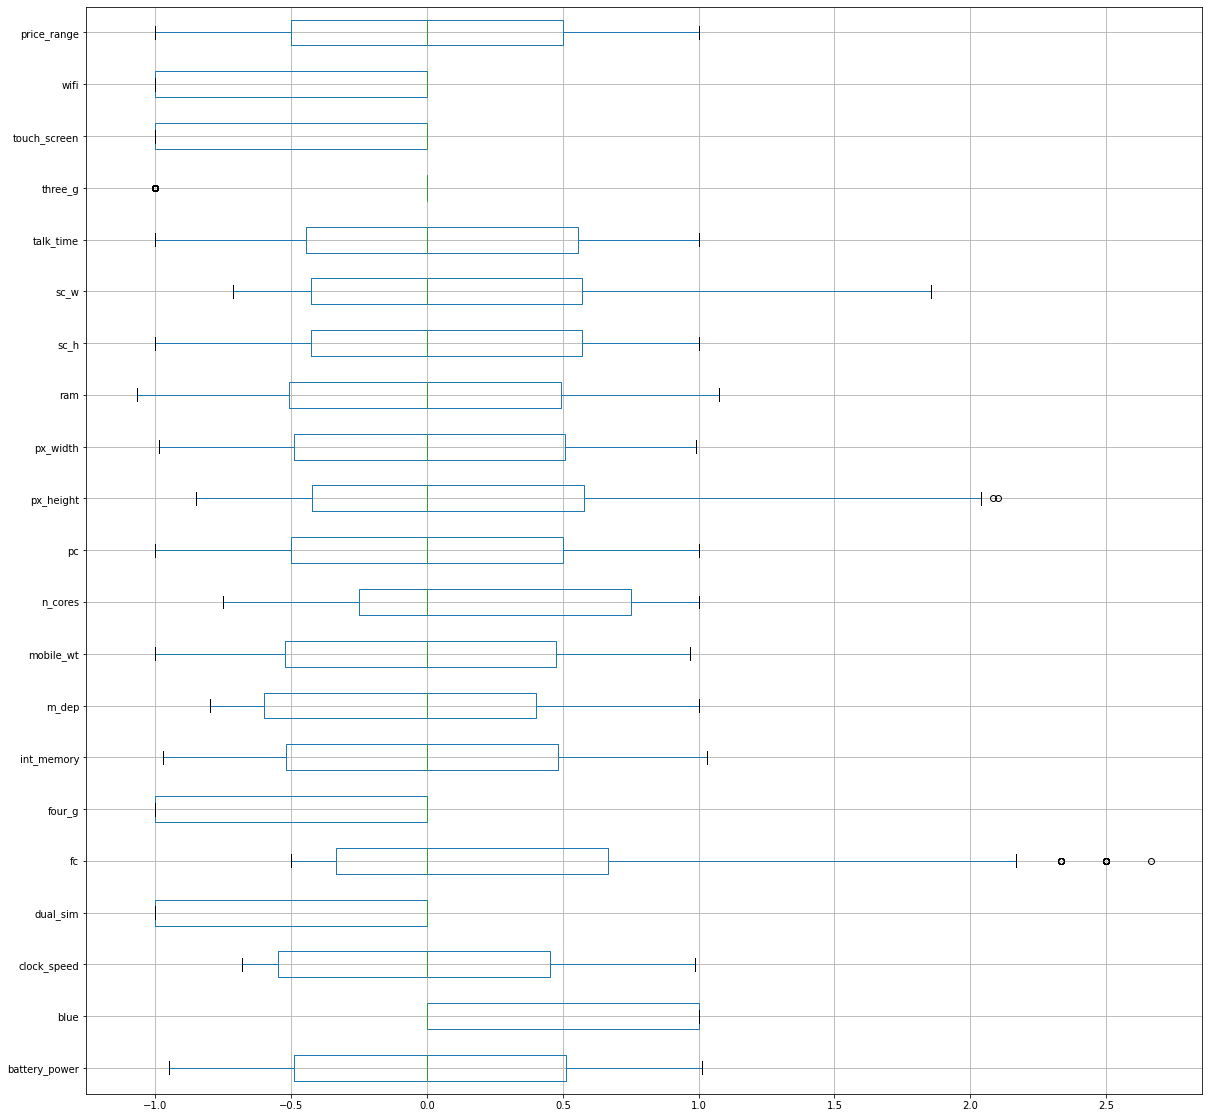

In [ ]:
# mengecek keberadaan outlier
df_scaled.boxplot(vert=False,figsize=(20,20))

Saya tidak menghilangkan outlier. Berikut alasannya:


1.   atribut fc & px_height: outlier fc berjumlah 18 dari 2021 yang mana berarti ada outlier 0.009% dan untuk px_height berjumlah 2 dari 2021, ini merupakan jumlah yang sangat kecil sehingga tidak signifikan dan berbahaya untuk data
2.   atribut three_g: outlier berjumlah 480 yaitu sangat banyak, tapi dilihat kembali bahwa tipe data atribut ini adalah binary (0 dan 1) sehingga berarti yang dibaca outlier ini sebenarnya adalah data valid, maka itu tidak saya hapus

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.600000,188,2,...,20,756,2549.0,9,7,11.022716,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.700000,136,3,...,905,1988,2631.0,17,3,7.000000,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.900000,145,5,...,1263,1716,2603.0,11,2,9.000000,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.800000,131,6,...,1216,1786,2769.0,16,8,11.000000,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,0.501556,141,2,...,1208,1212,1411.0,8,2,15.000000,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,794,1,0.5,1,0,1,2.0,0.800000,106,6,...,1222,1890,668.0,13,4,19.000000,1,1.0,0.0,0
2017,1965,1,2.6,1,0,0,39.0,0.501556,187,4,...,915,1965,2032.0,11,10,16.000000,1,1.0,1.0,2
2018,1911,0,0.9,1,1,1,36.0,0.700000,108,8,...,868,1632,3057.0,9,1,5.000000,1,1.0,0.0,3
2019,1512,0,0.9,0,4,1,46.0,0.501556,145,5,...,336,670,869.0,18,10,19.000000,1,1.0,1.0,0


In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.600000,188,2,...,20,756,2549.0,9,7,11.022716,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.700000,136,3,...,905,1988,2631.0,17,3,7.000000,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.900000,145,5,...,1263,1716,2603.0,11,2,9.000000,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.800000,131,6,...,1216,1786,2769.0,16,8,11.000000,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,0.501556,141,2,...,1208,1212,1411.0,8,2,15.000000,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,794,1,0.5,1,0,1,2.0,0.800000,106,6,...,1222,1890,668.0,13,4,19.000000,1,1.0,0.0,0
2017,1965,1,2.6,1,0,0,39.0,0.501556,187,4,...,915,1965,2032.0,11,10,16.000000,1,1.0,1.0,2
2018,1911,0,0.9,1,1,1,36.0,0.700000,108,8,...,868,1632,3057.0,9,1,5.000000,1,1.0,0.0,3
2019,1512,0,0.9,0,4,1,46.0,0.501556,145,5,...,336,670,869.0,18,10,19.000000,1,1.0,1.0,0


Asumsi yang dipakai adalah data cukup dibersihkan dengan penanganan missing value, duplikasi, dan outlier sehingga sudah cukup untuk penanganan yang dilakukan

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Jawaban: Klasifikasi untuk data ini (mobile_phone) perlu dilakukan normalisasi atau tidak cukup menggunakan data asli. Hal ini untuk menghilangkan dan mengurangi redudansi data, mempercepat jalannya prediksi pada model prediksi tertentu, dan diketahui adanya column yang memiliki range value berbeda jauh dengan yang lain atau terdapat value yang memiliki nilai jauh lebih besar. Karena data ini tanpa outlier (dengan mengabaikan outlier three_g karena binary) maka akan dilakukan Min Max atau linear scaling, yaitu mengubah distribusi data dalam range 0-1.

In [ ]:
df_cleaned.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.524754,0.509500,4.309500,0.521500,32.050567,0.501970,140.249000,4.520500,...,645.108000,1251.515500,2117.266549,12.306500,5.767000,11.033454,0.761500,0.529000,0.534000,1.500000
std,439.418206,0.5001,0.794724,0.500035,4.341444,0.499662,17.712784,0.282836,35.399655,2.287837,...,443.780811,432.199447,1057.458990,4.213245,4.356398,5.342628,0.426273,0.499283,0.498967,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1234.000000,9.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.521302,1.000000,3.000000,1.000000,32.086162,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2120.320187,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,47.000000,0.700000,170.000000,7.000000,...,947.250000,1633.000000,2978.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
X = df_cleaned.drop('price_range', axis=1)
Y = df_cleaned['price_range']

from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, clip=False, feature_range=(0, 1))
scaled = scaler.fit_transform(X)

X = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.409902,0.509500,0.226816,0.521500,0.484687,0.446633,0.502075,0.502929,0.495825,0.329137,0.501679,0.497399,0.521893,0.320389,0.501859,0.761500,0.529000,0.534000
std,0.293533,0.5001,0.317889,0.500035,0.228497,0.499662,0.285690,0.314262,0.294997,0.326834,0.303216,0.226419,0.288518,0.282592,0.300946,0.242022,0.296813,0.426273,0.499283,0.498967
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144260,0.250167,0.261358,0.285714,0.111111,0.277778,1.000000,0.000000,0.000000
50%,0.484302,0.0000,0.408521,1.000000,0.157895,1.000000,0.485261,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.498215,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.725806,0.666667,0.750000,0.857143,0.750000,0.483291,0.756342,0.727619,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

Feature selection methods yang saya gunakan adalah correlation matrix with heatmap, dengan menggunakan metode ini saya dapat dengan mudah mengidentifikasikan fitur mana yang paling berkaitan dengan variabel targer (price_range)

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=20,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0) 
sfs.fit(X, Y)
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,feature_idx,cv_scores,avg_score,feature_names
1,"(13,)",[0.7979828886367943],0.797983,"(ram,)"
2,"(0, 13)",[0.8367998102534121],0.8368,"(battery_power, ram)"
3,"(0, 12, 13)",[0.8632058550413155],0.863206,"(battery_power, px_width, ram)"
4,"(0, 11, 12, 13)",[0.8713100476679723],0.87131,"(battery_power, px_height, px_width, ram)"
5,"(0, 8, 11, 12, 13)",[0.8720838205395034],0.872084,"(battery_power, mobile_wt, px_height, px_width..."
6,"(0, 6, 8, 11, 12, 13)",[0.8722100585923281],0.87221,"(battery_power, int_memory, mobile_wt, px_heig..."
7,"(0, 3, 6, 8, 11, 12, 13)",[0.8723018233448597],0.872302,"(battery_power, dual_sim, int_memory, mobile_w..."
8,"(0, 3, 6, 8, 10, 11, 12, 13)",[0.8723508497142478],0.872351,"(battery_power, dual_sim, int_memory, mobile_w..."
9,"(0, 2, 3, 6, 8, 10, 11, 12, 13)",[0.8723938654402529],0.872394,"(battery_power, clock_speed, dual_sim, int_mem..."
10,"(0, 2, 3, 6, 8, 10, 11, 12, 13, 18)",[0.8724226172705332],0.872423,"(battery_power, clock_speed, dual_sim, int_mem..."


5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

In [ ]:
X_select = X[['battery_power', 'px_height', 'px_width', 'ram']]

> Jawaban: 
Dari output diatas saya mengambil avg_score terbaik yaitu dengan 4 fitur: battery_power, px_height, px_width, dan ram. Sebenarnya memang 20 fitur paling baik, namun dari fitur 4-20 perbedaannya tipis-tipis jadi saya pakai untuk 4 fitur saja, saya rasa perbedaannya tidak signifikan lagi jika menambah fitur.

Pemilihan ini dilakukan dengan strategi wrapper feature selection dengan metode forward selection. 

Referensi: https://towardsdatascience.com/feature-selection-for-machine-learning-in-python-wrapper-methods-2b5e27d2db31

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [ ]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
temp = 99999999
K = 0
for i in range (2, 22):
  cv = KFold(n_splits=i, random_state=1, shuffle=True) 
  #build multiple linear regression model
  model = LinearRegression()
  #use LOOCV to evaluate model
  scores = cross_val_score(model, X_select, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
  #view RMSE
  RMSE = sqrt(mean(absolute(scores)))
  if RMSE < temp:
    temp = RMSE
    K = i

print(temp)
print(K)

0.401988294688924
15


In [ ]:
kf = KFold(n_splits=15, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X_select):
  X_train, X_test, y_train, y_test = X_select.iloc[train_index], X_select.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))
    print("Akurasi:"+ str(accuracy_score(y_test, prediction)))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Melakukan training pada model decision tree
dt_7 = DecisionTreeClassifier()
dt_7.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Memprediksi data testing
prediction = dt_7.predict(X_test)

# Call the metrics function
metrics(prediction)

MAE: 0.23308270676691728
MSE: 0.2932330827067669
RMSE: 0.5415100024069426
R_squared: 0.7381361066235863
Akurasi:0.7969924812030075


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [ ]:
# Melakukan training pada model decision tree
dt_8 = DecisionTreeClassifier(min_samples_leaf=50)
dt_8.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
# Memprediksi data testing
prediction = dt_8.predict(X_test)

# Call the metrics function
metrics(prediction)

MAE: 0.2706766917293233
MSE: 0.3458646616541353
RMSE: 0.5881025944970276
R_squared: 0.6911348949919224
Akurasi:0.7593984962406015


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 
Dari hasil metrics(prediction), MAE, MSE, dan RMSE pada model di soal nomor 8 lebih tinggi dibanding hasil dari model pada soal nomor 7. Kemudian, akurasi dan R_squared di nomor 7 juga lebih tinggi dari akurasi nomor 8.

> Hal ini menandakan bahwa model dengan kualitas yang lebih baik adalah model yang ada pada nomor 7. 

> Perbedaan yang ada adalah dikarenakan parameter min_samples_leaf yang diberikan. Analisis saya adalah dengan adanya parameter ini, ada jumlah minimum dari sampel yang dibutuhkan pada leaf node. Sehingga model pada nomor 7 akan melakukan metriks prediksi lebih menyeluruh tanpa ada batasan leaf-nya berbeda dengan model pada nomor 8. Berarti yang terbaik memang ketika leaf dipecah lagi tidak berhenti sampai 50 saja lead nodenya, sehingga akurasi lebih tinggi di nomor 7 dan error-error lebih rendah juga di nomor 7. 

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_10 = {'criterion': ["gini", "entropy"],
               'max_leaf_nodes': [ 5, 10, 20, 50, 75, None],
               'max_depth' : [ 5, 10, 20, 50, 75, None]}

rf_10 = DecisionTreeClassifier(random_state=42)

clf_10 = GridSearchCV(estimator= rf_10, 
                   param_grid=param_grid_10,verbose=1 ,cv= 5)

clf_10.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50, 75, None],
                         'max_leaf_nodes': [5, 10, 20, 50, 75, None]},
             verbose=1)

In [ ]:
clf_10.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None}

In [ ]:
best_hp = DecisionTreeClassifier()
best_hp.fit(X_train, y_train)
prediction2 = best_hp.predict(X_test)
metrics(prediction2)

MAE: 0.21804511278195488
MSE: 0.2631578947368421
RMSE: 0.512989176042577
R_squared: 0.76499394184168
Akurasi:0.8045112781954887


### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Melakukan training pada model random forest
rf_11 = RandomForestClassifier()
rf_11.fit(X_train, y_train)

# Memprediksi data testing
prediction3 = rf_11.predict(X_test)

# Menampilkan metrics
metrics(prediction3)

MAE: 0.15037593984962405
MSE: 0.18045112781954886
RMSE: 0.4247953952428732
R_squared: 0.8388529886914378
Akurasi:0.8646616541353384


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [45]:
param_grid_12 = {'criterion': ["gini", "entropy"],
               'max_leaf_nodes': [ 5, 10, 20, 50, 75, None],
               'max_depth' : [ 5, 10, 20, 50, 75, None]}

rf_12 = RandomForestClassifier(random_state=42)

clf_12 = GridSearchCV(estimator= rf_12, 
                   param_grid=param_grid_12, verbose=1, cv= 5)

clf_12.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50, 75, None],
                         'max_leaf_nodes': [5, 10, 20, 50, 75, None]},
             verbose=1)

In [47]:
clf_12.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': None}

In [65]:
rf_12a = RandomForestClassifier(**clf_12.best_params_)
rf_12a.fit(X_train, y_train)
predicted3 = rf_12a.predict(X_test)
metrics(predicted3)

MAE: 0.14285714285714285
MSE: 0.17293233082706766
RMSE: 0.4158513326022506
R_squared: 0.8455674474959611
Akurasi:0.8721804511278195


13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: Model yang lebih baik adalah model pada nomor 12, karena dapat dilihat bahwa MAE, MSE, dan RMSE lebih rendah dari soal pada nomor 11. Dapat dilihat juga untuk R_squared dan akurasinya didapatkan nomor 12 lebih tinggi dari nomor 11.

> Perubahan atau peningkatan kualitas model ini bisa didapati karena dilakukan hyperparameter tuning pada soal nomor 12 dalam penentuan parameter terbaik. Jadi, terdapat proses untuk menghindari overfitting pada model, maka itu MAE, MSE, RMSE jadi lebih kecil dari soal sebelumnya dan R_squared beserta akurasi jadi punya nilai yang lebih tinggi. Mengingat pada nomor 11 tidak ada parameter sama sekali.

> Sehingga disini dapat dianalisis bahwa dalam membuat model yang memiliki kualitas lebih baik, maka tepat jika dilakukan hyperparameter tuning untuk menentukan parameter terbaik bagi model. Pada dasarnya hyperparameter tuning dapat digunakan untuk dapat hasil evaluasi yang terbaik untuk suatu model, karena dengan hyperparameter dapat dicek kombinasi yang kita inginkan untuk dapat parameter terbaik dan dalam pencarian hyperparameter yang tepat, juga bisa pakai modul GridSearchCV (seperti yang saya pakai)

### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [73]:
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

# Implementasi model Naive Bayes dengan variasi Gaussian
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

# Fungsi untuk memberi hasil evaluasi 
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy:', accuracy_score(y_test, y_pred_gnb))
    print('F1 Macro Average:', f1_score(y_test, y_pred_gnb, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, y_pred_gnb, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, y_pred_gnb, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, y_pred_gnb, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, y_pred_gnb, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, y_pred_gnb, average='micro',zero_division=0))
    print()

# Pemanggilan evaluasi
evaluate_classifier_performance(y_pred_gnb,y_test)    

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.67      0.63      0.65        41
           2       0.63      0.71      0.67        34
           3       0.96      0.89      0.93        28

    accuracy                           0.76       133
   macro avg       0.78      0.77      0.78       133
weighted avg       0.76      0.76      0.76       133



Confusion Matrix



prediction,0,1,2,3
actual,,,,
0,26,3,1,0
1,4,26,11,0
2,0,9,24,1
3,0,1,2,25




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy: 0.7593984962406015
F1 Macro Average: 0.7773148148148149
F1 Micro Average: 0.7593984962406015
Precision Macro Average: 0.781612685560054
Precision Micro Average: 0.7593984962406015
Recall Macro Average: 0.7748881259821002
Recall Micro Average: 0.7593984962406015



15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban: Mayoritas fitur-fitur atau atribut pada data mobile_phone memiliki tipe data numerik yang kontinu, maka itu dapat dengan mudah saya pilih model Gaussian Naive Bayes. 

> Jawaban ini saya dapatkan dari analisis pemilihan variasi Gaussian yang saya kerjakan pada Lab5 lalu, dimana dalam penentuan penggunaan variasi bisa dengan melihat secara keseluruhan tipe data. 
1.   mobile_phones memiliki beragam tipe data ada kategorikal dalam bentuk biner, adapula numerik. Namun **secara keseluruhan** mayoritas tipe data adalah numerik, maka jelas antara multinomial, gaussian, atau complement
2.   nah, dari sini tinggal dilihat fitur atau atribut yang ada mewakili jumlah diskrit atau kontinu. Dengan mudah dapat diketahui dari penjelasan fitur diawal soal bahwa fitur-fitur ini mewakili jumlah kontinu sehingga jelas jawabannya adalah **Gaussian** 

Referensi:

*   https://algorit.ma/blog/naive-bayes-2022/
* https://www.dqlab.id/belajar-algotirma-naive-bayes



16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban:
Ya, menurut referensi yang saya baca, memang seharusnya kita hanya pakai satu variasi dari Naive Bayers, bukan 1 variasi per fitur atau dibeda-bedakan. Berbedaan tipe data dari data yang adalah yang perlu dinormalisasi atau diselaraskan, misal jadikan yang kategorik menjadi numerik contohnya dengan one hot encoding atau labeling. Setelah itu baru kita pilih Naive bayers yang sesuai.

> Referensi:
- https://stackoverflow.com/questions/33477736/how-to-combine-the-outputs-of-multiple-naive-bayes-classifier

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [121]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3) # kita akan menggunakan nilai 3 seperti yang sebelumnya didapat
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [122]:
y_pred = KNN.predict(X_test)
y_pred

array([0, 2, 1, 0, 0, 0, 2, 1, 2, 3, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 0, 0, 1, 1, 1, 2, 3, 1, 1, 3, 3, 1,
       1, 0, 1, 2, 1, 0, 3, 0, 3, 2, 1, 0, 2, 3, 0, 3, 3, 0, 1, 0, 0, 1,
       3, 1, 3, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 3, 1, 1, 1, 3, 1, 1, 2, 0,
       2, 3, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 3, 2, 3, 2, 0,
       2, 3, 2, 0, 3, 0, 1, 0, 1, 2, 3, 1, 0, 3, 0, 1, 1, 0, 2, 2, 3, 3,
       3])

In [123]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance2(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy KNN is : ', accuracy_score(y_test, prediction))
    print('Precision KNN is : ', precision_score(y_test, prediction, average="weighted"))
    print('F1 Score KNN is : ', f1_score(y_test, prediction, average="weighted"))
    print('Recall Score KNN is : ', recall_score(y_test, prediction, average="weighted"))
    print()

In [124]:
evaluate_classifier_performance2(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.85      0.85      0.85        41
           2       0.81      0.74      0.77        34
           3       0.89      0.89      0.89        28

    accuracy                           0.84       133
   macro avg       0.84      0.85      0.84       133
weighted avg       0.84      0.84      0.84       133



Confusion Matrix



prediction,0,1,2,3
actual,,,,
0,27,3,0,0
1,2,35,4,0
2,4,2,25,3
3,0,1,2,25




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy KNN is :  0.8421052631578947
Precision KNN is :  0.8418406720613851
F1 Score KNN is :  0.8411137734446005
Recall Score KNN is :  0.8421052631578947



18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [129]:
# Optimalisasi KNN dengan gridsearch CV

# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=5,
                   verbose = 2
                    )

clfKNN.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[C

In [130]:
KNN = KNeighborsClassifier(n_neighbors=5) #berdasarkan parameter tuning
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print('Accuracy KNN is : ', accuracy_score(y_test, y_pred))
evaluate_classifier_performance2(y_pred,y_test)

Accuracy KNN is :  0.8571428571428571
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.81      0.83      0.82        41
           2       0.78      0.85      0.82        34
           3       0.96      0.86      0.91        28

    accuracy                           0.86       133
   macro avg       0.87      0.86      0.86       133
weighted avg       0.86      0.86      0.86       133



Confusion Matrix



prediction,0,1,2,3
actual,,,,
0,27,3,0,0
1,2,34,5,0
2,0,4,29,1
3,0,1,3,24




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy KNN is :  0.8571428571428571
Precision KNN is :  0.862031273096868
F1 Score KNN is :  0.8585047144194652
Recall Score KNN is :  0.8571428571428571



### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban: Menurut saya empat variasi model ini dapat menjadi variasi terbaik pada tiap tiap jenis data yang berbeda. Semuanya tergantung pada jenis data, karakteristik data, dan ekspektasi hasil dari penguji atau peneliti. Namun halnya memang ada model model yang diciptakan untuk menutupi kekurangan model terdahulu

> Pada kasus ini melalui analisis hasil evaluasi saya lihat **model Random forest menjadi model dengan performa terbaik**. 

> Berikut ini saya ringkas hasil evaluasi akurasi dari keempat model (setelah hyperparameter tuning):
- Decision tree (setelah parameter): 0.7593
- **Random forest: 0.872**
- Naive Bayes: 0.842
- KNN: 0.857 

> Dari hasil diatas dapat dianalisis bahwa model dengan performa terbaik pada data mobile_phone adalah model random forest dengan akurasi mencapai 0.872 (bisa dibulatkan jadi 0.87 atau 0.9), sangat dekat dengan 1. Dapat dikatakan akurasi ini sudah sangat tinggi atau cukup tinggi. Random forest ini sudah di hyperparameter tuning yang dapat menentukan nilai yang paling tepat ({'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': None}). Hal ini menjadikan model menghindari overfitting dengan baik.

> Kelebihannya dari model lain random forest juga sangat dianjurkan pada data yang besar. Mengingat data bersih berjumlah 2000, random forest merupakan model yang tepat. 

> Berikut ini juga merupakan kelebihan dari random forest yang cocok dengan data mobile_phone:
- Kuat terhadap data outlier.
- Risiko overfitting lebih rendah.
- Berjalan secara efisien pada kumpulan data yang besar.
